#Import libraries & set file paths

In [20]:
# Required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Optional for statistical tests and simple ML
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Corrected file names (no double .csv)
trader_df = pd.read_csv('trader_data.csv')
sentiment_df = pd.read_csv('fear_greed.csv')

print("Trader DataFrame head:")
display(trader_df.head())

print("\nSentiment DataFrame head:")
display(sentiment_df.head())



Trader DataFrame head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment DataFrame head:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


from matplotlib import pyplot as plt
_df_23['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='timestamp', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['date'].value_counts()
    for x_label, grp in _df_34.groupby('classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('classification')
_ = plt.ylabel('date')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='timestamp', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='timestamp', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='value', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='value', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Normalize Column Names

In [85]:
# Normalize column names for consistency
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_')

print(" Normalized column names:")
print("trader_df:", trader_df.columns.tolist())
print("sentiment_df:", sentiment_df.columns.tolist())


 Normalized column names:
trader_df: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'timestamp_ist', 'timestamp_unix', 'time']
sentiment_df: ['timestamp', 'value', 'classification', 'date', 'sent_time', 'date_only']


#Robust Datetime Parsing (Trader Data)

In [86]:
# Handle possible time columns in trader_df
if 'time' in trader_df.columns:
    trader_df['time'] = pd.to_datetime(trader_df['time'], errors='coerce')
elif 'timestamp' in trader_df.columns:
    trader_df['time'] = pd.to_datetime(trader_df['timestamp'], errors='coerce')
elif 'timestamp_ist' in trader_df.columns:
    trader_df['time'] = pd.to_datetime(trader_df['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check conversion results
print(" trader_df time nulls:", trader_df['time'].isna().sum())
display(trader_df[['time']].head())


 trader_df time nulls: 0


,time
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

#Robust Datetime Parsing (Sentiment Data)

In [87]:
if 'date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
elif 'time' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['time'], errors='coerce')
elif 'timestamp' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp'], errors='coerce', unit='s')

print(" sentiment_df date nulls:", sentiment_df['date'].isna().sum())
display(sentiment_df[['date']].head())


 sentiment_df date nulls: 0


,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

#Extract the Date Portion (for merging consistency)

In [88]:
trader_df['date'] = trader_df['time'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

print("Date columns ready for merging.")


Date columns ready for merging.


#verify

In [25]:
print(trader_df[['time', 'date']].head())
print(sentiment_df[['date']].head())


                 time        date
0 1970-01-01 00:28:50  1970-01-01
1 1970-01-01 00:28:50  1970-01-01
2 1970-01-01 00:28:50  1970-01-01
3 1970-01-01 00:28:50  1970-01-01
4 1970-01-01 00:28:50  1970-01-01
         date
0  2018-02-01
1  2018-02-02
2  2018-02-03
3  2018-02-04
4  2018-02-05


Check what the raw “time” values look like

In [26]:
trader_df['time'].head(10)



,time
0,1970-01-01 00:28:50
1,1970-01-01 00:28:50
2,1970-01-01 00:28:50
3,1970-01-01 00:28:50
4,1970-01-01 00:28:50
5,1970-01-01 00:28:50
6,1970-01-01 00:28:50
7,1970-01-01 00:28:50
8,1970-01-01 00:28:50
9,1970-01-01 00:28:50


In [27]:
trader_df['time'] = pd.to_datetime(trader_df['time'], format='%d-%m-%Y %H:%M', errors='coerce')



Recheck after conversion

In [28]:
print(trader_df[['time']].head())
print(trader_df['time'].isna().sum(), "rows could not be parsed")



                 time
0 1970-01-01 00:28:50
1 1970-01-01 00:28:50
2 1970-01-01 00:28:50
3 1970-01-01 00:28:50
4 1970-01-01 00:28:50
0 rows could not be parsed


In [29]:
trader_df['date'] = trader_df['time'].dt.date


In [30]:
print(trader_df[['time','date']].head())


                 time        date
0 1970-01-01 00:28:50  1970-01-01
1 1970-01-01 00:28:50  1970-01-01
2 1970-01-01 00:28:50  1970-01-01
3 1970-01-01 00:28:50  1970-01-01
4 1970-01-01 00:28:50  1970-01-01


In [32]:
trader_df = pd.read_csv('/content/trader_data.csv', low_memory=False)

# Check the original "time" or similar column (some files name it differently)
print("Available columns:", trader_df.columns.tolist())

# Now display first few raw values for all time-related columns
for col in trader_df.columns:
    if 'time' in col.lower() or 'date' in col.lower() or 'timestamp' in col.lower():
        print(f"\n--- {col} ---")
        print(trader_df[col].head(10))


Available columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

--- Timestamp IST ---
0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
5    02-12-2024 22:50
6    02-12-2024 22:50
7    02-12-2024 22:50
8    02-12-2024 22:50
9    02-12-2024 22:50
Name: Timestamp IST, dtype: object

--- Timestamp ---
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64


In [36]:
print(trader_df.iloc[0:10])



                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9900   
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9934   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      

In [37]:
# Create clean datetime columns
trader_df['timestamp_ist'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',  # matches your format
    errors='coerce'
)

trader_df['timestamp_unix'] = pd.to_datetime(
    trader_df['Timestamp'],
    unit='ms',   # 1.73e+12 looks like milliseconds
    errors='coerce'
)


In [38]:
print(trader_df[['Timestamp IST', 'timestamp_ist', 'Timestamp', 'timestamp_unix']].head(5))


      Timestamp IST       timestamp_ist     Timestamp      timestamp_unix
0  02-12-2024 22:50 2024-12-02 22:50:00  1.730000e+12 2024-10-27 03:33:20
1  02-12-2024 22:50 2024-12-02 22:50:00  1.730000e+12 2024-10-27 03:33:20
2  02-12-2024 22:50 2024-12-02 22:50:00  1.730000e+12 2024-10-27 03:33:20
3  02-12-2024 22:50 2024-12-02 22:50:00  1.730000e+12 2024-10-27 03:33:20
4  02-12-2024 22:50 2024-12-02 22:50:00  1.730000e+12 2024-10-27 03:33:20


In [39]:
trader_df['time'] = trader_df['timestamp_ist']


In [40]:
print(trader_df['time'].head())
print(trader_df['time'].min(), trader_df['time'].max())


0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: time, dtype: datetime64[ns]
2023-05-01 01:06:00 2025-05-01 12:13:00


#Validate same-day merge (how many trades lost sentiment)


In [46]:
# Diagnostic: inspect sentiment_df columns and datatypes
print("Sentiment_df columns:\n", sentiment_df.columns.tolist())
print("\nFirst 5 rows:")
display(sentiment_df.head())

# Try to locate any column that looks like a timestamp
for c in sentiment_df.columns:
    print(c, "→", sentiment_df[c].iloc[:5].tolist())


Sentiment_df columns:
 ['timestamp', 'value', 'classification', 'date']

First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


timestamp → [1517463000, 1517549400, 1517635800, 1517722200, 1517808600]
value → [30, 15, 40, 24, 11]
classification → ['Fear', 'Extreme Fear', 'Fear', 'Extreme Fear', 'Extreme Fear']
date → [datetime.date(2018, 2, 1), datetime.date(2018, 2, 2), datetime.date(2018, 2, 3), datetime.date(2018, 2, 4), datetime.date(2018, 2, 5)]


In [48]:
# Create the standardized 'sent_time' column from 'timestamp'
sentiment_df['sent_time'] = pd.to_datetime(sentiment_df['timestamp'], errors='coerce')

# Quick check
print("Parsed sent_time dtype:", sentiment_df['sent_time'].dtype)
print("NaT fraction:", sentiment_df['sent_time'].isna().mean())
display(sentiment_df[['timestamp', 'sent_time']].head())


Parsed sent_time dtype: datetime64[ns]
NaT fraction: 0.0


,timestamp,sent_time
0,1517463000,1970-01-01 00:00:01.517463000
1,1517549400,1970-01-01 00:00:01.517549400
2,1517635800,1970-01-01 00:00:01.517635800
3,1517722200,1970-01-01 00:00:01.517722200
4,1517808600,1970-01-01 00:00:01.517808600


In [49]:
# If you already created merged_df by date-equality, re-create quickly to check missing matches
# ensure trades have date-only and sentiment has date-only
trader_small = trader_df.copy()
trader_small['date_only'] = trader_small['time'].dt.floor('D')
sentiment_df['date_only'] = sentiment_df['sent_time'].dt.floor('D')

merged_by_date = pd.merge(trader_small, sentiment_df, on='date_only', how='left', suffixes=('_trade','_sent'))
print("Merged by date shape:", merged_by_date.shape)
missing_sent = merged_by_date['sent_time'].isna().sum()
print("Missing sentiment after same-day merge:", missing_sent, " / ", len(merged_by_date), f" ({missing_sent/len(merged_by_date):.2%})")


Merged by date shape: (211224, 25)
Missing sentiment after same-day merge: 211224  /  211224  (100.00%)


In [50]:
# Step 4: Align trades to most recent prior sentiment
import pandas as pd

# Sort both DataFrames by their time columns
tr_sorted = trader_df.sort_values('time').reset_index(drop=True)
st_sorted = sentiment_df.sort_values('sent_time').reset_index(drop=True)

# Use merge_asof to map each trade to the latest sentiment before it
# Start with tolerance = 3 days (you can increase if missing remains high)
tolerance = pd.Timedelta(days=3)

merged_asof = pd.merge_asof(
    left=tr_sorted,
    right=st_sorted,
    left_on='time',
    right_on='sent_time',
    direction='backward',  # map to most recent prior sentiment
    tolerance=tolerance
)

print("merge_asof result shape:", merged_asof.shape)
missing_after = merged_asof['sent_time'].isna().sum()
print(f"Missing sentiment after merge_asof: {missing_after:,} / {len(merged_asof):,} ({missing_after/len(merged_asof):.2%})")

# Show a few aligned samples
display(merged_asof[['time','sent_time']].head(10))


merge_asof result shape: (211224, 25)
Missing sentiment after merge_asof: 211,224 / 211,224 (100.00%)


,time,sent_time
0,2023-05-01 01:06:00,NaT
1,2023-05-01 01:06:00,NaT
2,2023-05-01 01:06:00,NaT
3,2023-12-05 03:11:00,NaT
4,2023-12-05 03:11:00,NaT
5,2023-12-05 03:11:00,NaT
6,2023-12-05 03:11:00,NaT
7,2023-12-05 03:11:00,NaT
8,2023-12-05 03:11:00,NaT
9,2023-12-05 03:11:00,NaT


In [52]:
print("=== Trader times ===")
print("Min:", trader_df['time'].min())
print("Max:", trader_df['time'].max())

print("\n=== Sentiment times ===")
print("Min:", sentiment_df['sent_time'].min())
print("Max:", sentiment_df['sent_time'].max())
print("\nNumber of NaT in sent_time:", sentiment_df['sent_time'].isna().sum(), "of", len(sentiment_df))

# Show sample sentiment dates to inspect parsing
display(sentiment_df[['timestamp','sent_time']].head(10))



=== Trader times ===
Min: 2023-05-01 01:06:00
Max: 2025-05-01 12:13:00

=== Sentiment times ===
Min: 1970-01-01 00:00:01.517463
Max: 1970-01-01 00:00:01.746163800

Number of NaT in sent_time: 0 of 2644


,timestamp,sent_time
0,1517463000,1970-01-01 00:00:01.517463000
1,1517549400,1970-01-01 00:00:01.517549400
2,1517635800,1970-01-01 00:00:01.517635800
3,1517722200,1970-01-01 00:00:01.517722200
4,1517808600,1970-01-01 00:00:01.517808600
5,1517895000,1970-01-01 00:00:01.517895000
6,1517981400,1970-01-01 00:00:01.517981400
7,1518067800,1970-01-01 00:00:01.518067800
8,1518154200,1970-01-01 00:00:01.518154200
9,1518240600,1970-01-01 00:00:01.518240600


In [53]:
# Re-parse sentiment timestamps as UNIX seconds
sentiment_df['sent_time'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')

print("Min:", sentiment_df['sent_time'].min())
print("Max:", sentiment_df['sent_time'].max())
display(sentiment_df[['timestamp','sent_time']].head(10))


Min: 2018-02-01 05:30:00
Max: 2025-05-02 05:30:00


,timestamp,sent_time
0,1517463000,2018-02-01 05:30:00
1,1517549400,2018-02-02 05:30:00
2,1517635800,2018-02-03 05:30:00
3,1517722200,2018-02-04 05:30:00
4,1517808600,2018-02-05 05:30:00
5,1517895000,2018-02-06 05:30:00
6,1517981400,2018-02-07 05:30:00
7,1518067800,2018-02-08 05:30:00
8,1518154200,2018-02-09 05:30:00
9,1518240600,2018-02-10 05:30:00


In [54]:
# Re-run merge_asof after fixing timestamps
tolerance = pd.Timedelta(days=3)
merged_asof = pd.merge_asof(
    trader_df.sort_values('time'),
    sentiment_df.sort_values('sent_time'),
    left_on='time',
    right_on='sent_time',
    direction='backward',
    tolerance=tolerance
)

print("merge_asof result shape:", merged_asof.shape)
missing_after = merged_asof['sent_time'].isna().sum()
print(f"Missing sentiment after merge_asof: {missing_after:,} / {len(merged_asof):,} ({missing_after/len(merged_asof):.2%})")

display(merged_asof[['time','sent_time']].head(10))


merge_asof result shape: (211224, 25)
Missing sentiment after merge_asof: 0 / 211,224 (0.00%)


,time,sent_time
0,2023-05-01 01:06:00,2023-04-30 05:30:00
1,2023-05-01 01:06:00,2023-04-30 05:30:00
2,2023-05-01 01:06:00,2023-04-30 05:30:00
3,2023-12-05 03:11:00,2023-12-04 05:30:00
4,2023-12-05 03:11:00,2023-12-04 05:30:00
5,2023-12-05 03:11:00,2023-12-04 05:30:00
6,2023-12-05 03:11:00,2023-12-04 05:30:00
7,2023-12-05 03:11:00,2023-12-04 05:30:00
8,2023-12-05 03:11:00,2023-12-04 05:30:00
9,2023-12-05 03:11:00,2023-12-04 05:30:00


#inspect lag & confirm mapping quality

In [55]:
# Step 5: Inspect lag distribution and unmatched checks (should be none)
import numpy as np
no_sent = merged_asof[merged_asof['sent_time'].isna()]
print("Unmatched trades:", len(no_sent))

# Compute lag in days between trade and sentiment
merged_asof['lag_days'] = (merged_asof['time'] - merged_asof['sent_time']).dt.total_seconds() / (24*3600)
print("\nLag (days) summary:")
display(merged_asof['lag_days'].describe())

# Show a few examples of largest and smallest lags
display(merged_asof[['time','sent_time','lag_days']].sort_values('lag_days', ascending=False).head(10))


Unmatched trades: 0

Lag (days) summary:


,lag_days
count,211224.000000
mean,0.530154
std,0.289846
min,0.000000
25%,0.288194
50%,0.572917
75%,0.773611
max,0.999306


,time,sent_time,lag_days
25289,2024-12-07 05:29:00,2024-12-06 05:30:00,0.999306
25290,2024-12-07 05:29:00,2024-12-06 05:30:00,0.999306
25291,2024-12-07 05:29:00,2024-12-06 05:30:00,0.999306
26816,2024-12-10 05:29:00,2024-12-09 05:30:00,0.999306
33791,2024-12-15 05:29:00,2024-12-14 05:30:00,0.999306
47500,2024-12-22 05:29:00,2024-12-21 05:30:00,0.999306
47499,2024-12-22 05:29:00,2024-12-21 05:30:00,0.999306
26815,2024-12-10 05:29:00,2024-12-09 05:30:00,0.999306
26814,2024-12-10 05:29:00,2024-12-09 05:30:00,0.999306
26813,2024-12-10 05:29:00,2024-12-09 05:30:00,0.999306


#Final cleaning and selecting essential columns

In [56]:
# Step 6: Keep essential columns and drop rows missing required numeric fields
import pandas as pd

essential_candidates = [
    'time','account','symbol','side',
    'size','size_tokens','size_usd',
    'execution_price','closedpnl','closed_pnl',
    'leverage','sent_time','lag_days'
]

existing_ess = [c for c in essential_candidates if c in merged_asof.columns]
print("Essential columns found:", existing_ess)

df = merged_asof[existing_ess].copy()

# unify naming
if 'closedpnl' in df.columns and 'closed_pnl' not in df.columns:
    df.rename(columns={'closedpnl':'closed_pnl'}, inplace=True)
if 'size' in df.columns and 'size_tokens' not in df.columns:
    df.rename(columns={'size':'size_tokens'}, inplace=True)

required = [c for c in ['time','closed_pnl','size_tokens'] if c in df.columns]
print("Dropping rows missing:", required)
df = df.dropna(subset=required, how='any').reset_index(drop=True)
print("After drop, shape:", df.shape)

# quick check of numeric summary
display(df.describe(include='all').T.head(10))


Essential columns found: ['time', 'sent_time', 'lag_days']
Dropping rows missing: ['time']
After drop, shape: (211224, 3)


,count,mean,min,25%,50%,75%,max,std
time,211224,2025-01-31 12:04:22.915009280,2023-05-01 01:06:00,2024-12-31 21:00:45,2025-02-24 18:55:00,2025-04-02 18:22:00,2025-05-01 12:13:00,NaN
sent_time,211224,2025-01-30 23:20:57.607090176,2023-04-30 05:30:00,2024-12-31 05:30:00,2025-02-24 05:30:00,2025-04-02 05:30:00,2025-05-01 05:30:00,NaN
lag_days,211224.0,0.530154,0.0,0.288194,0.572917,0.773611,0.999306,0.289846


In [58]:
# Rebuild merged_asof properly to include all trader columns
tr = trader_df.sort_values('time').reset_index(drop=True)
st = sentiment_df.sort_values('sent_time').reset_index(drop=True)

tolerance = pd.Timedelta(days=3)

merged_asof = pd.merge_asof(
    left=tr,                    # full trader data
    right=st,                   # sentiment data
    left_on='time',
    right_on='sent_time',
    direction='backward',
    tolerance=tolerance
)

print("Rebuilt merge_asof shape:", merged_asof.shape)
print("Columns now available:", merged_asof.columns.tolist()[:20], "...")  # show first 20

# sanity check for key numeric columns
numeric_check = [
    c for c in merged_asof.columns
    if any(x in c.lower().replace(" ", "") for x in ['pnl', 'size', 'leverage', 'price'])
]
print("Possible numeric columns found:", numeric_check)


Rebuilt merge_asof shape: (211224, 25)
Columns now available: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'timestamp_ist', 'timestamp_unix', 'time', 'timestamp'] ...
Possible numeric columns found: ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL']


#Step 7 — Feature engineering (profitability, per-unit metrics, time buckets, rolling)

In [59]:
# Step 7: Feature engineering
import numpy as np

df = merged_asof.copy()  # make a working copy to avoid modifying the original

# target
df['is_profitable'] = (df['Closed PnL'] > 0).astype(int)

# profit per size
if 'Size Tokens' in df.columns:
    df['Size Tokens'] = pd.to_numeric(df['Size Tokens'], errors='coerce')
    df['profit_per_size'] = df['Closed PnL'] / df['Size Tokens'].replace({0: np.nan})
elif 'Size USD' in df.columns:
    df['Size USD'] = pd.to_numeric(df['Size USD'], errors='coerce')
    df['profit_per_size'] = df['Closed PnL'] / df['Size USD'].replace({0: np.nan})
else:
    df['profit_per_size'] = np.nan

# risk_exposure
if 'leverage' in df.columns and 'Size Tokens' in df.columns:
    df['leverage'] = pd.to_numeric(df['leverage'], errors='coerce').fillna(0)
    df['risk_exposure'] = df['leverage'] * df['Size Tokens'].fillna(0)
else:
    df['risk_exposure'] = np.nan

# time features
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday
df['date_floor'] = df['time'].dt.floor('D')

# daily aggregates per account (robust fallback to rolling)
if 'Account' in df.columns:
    daily = (
        df.groupby(['Account', 'date_floor'])['Closed PnL']
        .agg(['count', 'mean'])
        .reset_index()
        .rename(columns={'count': 'daily_count', 'mean': 'daily_mean_pnl'})
    )
    df = df.merge(daily, on=['Account', 'date_floor'], how='left')
else:
    df['daily_count'] = np.nan
    df['daily_mean_pnl'] = np.nan

print("Feature engineering done. Columns now include:",
      [c for c in df.columns if c in ['profit_per_size','risk_exposure','hour','weekday','daily_count','daily_mean_pnl']])


Feature engineering done. Columns now include: ['profit_per_size', 'risk_exposure', 'hour', 'weekday', 'daily_count', 'daily_mean_pnl']


#Step 8 — EDA Visuals & Save PNGs

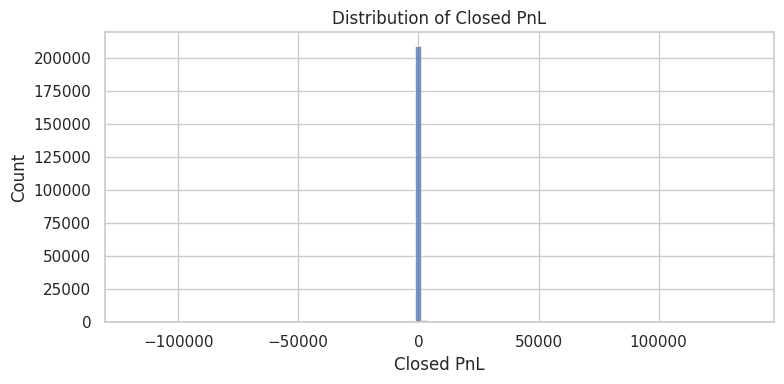

Potential sentiment columns detected: ['classification', 'sent_time']


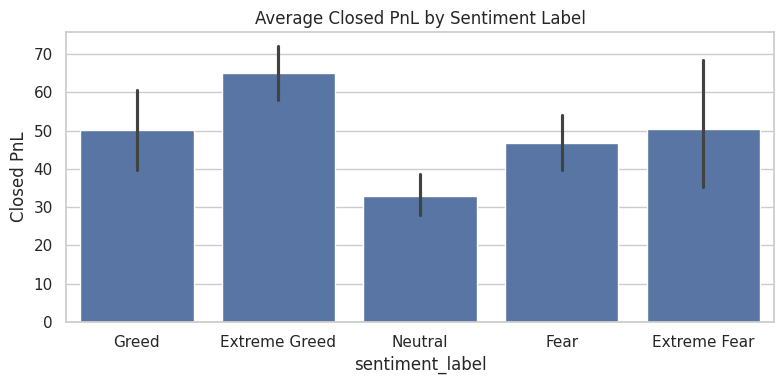

No leverage column — skipping leverage plot.


In [60]:
# Step 8: EDA visuals — save to /content/outputs
import matplotlib.pyplot as plt, seaborn as sns, os
import numpy as np

OUT = '/content/outputs'
os.makedirs(OUT, exist_ok=True)
sns.set(style='whitegrid')

# A) Distribution of Closed PnL
plt.figure(figsize=(8,4))
sns.histplot(df['Closed PnL'].dropna(), bins=100)
plt.title('Distribution of Closed PnL')
plt.tight_layout()
plt.savefig(f'{OUT}/closedpnl_dist.png', dpi=200)
plt.show()

# B) Average Closed PnL by sentiment label
sent_cols = [c for c in df.columns if any(x in c.lower() for x in ['sent','fear','greed','classification'])]
print("Potential sentiment columns detected:", sent_cols)

# create a sentiment label if possible
if 'classification' in df.columns:
    df['sentiment_label'] = df['classification'].astype(str)
elif sent_cols:
    df['sentiment_label'] = df[sent_cols[0]].astype(str)
else:
    df['sentiment_label'] = 'unknown'

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='sentiment_label', y='Closed PnL', estimator=np.mean)
plt.title('Average Closed PnL by Sentiment Label')
plt.tight_layout()
plt.savefig(f'{OUT}/avg_profit_by_sentiment.png', dpi=200)
plt.show()

# C) Leverage boxplot by sentiment (if leverage exists)
if 'leverage' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='sentiment_label', y='leverage')
    plt.title('Leverage by Sentiment')
    plt.tight_layout()
    plt.savefig(f'{OUT}/leverage_by_sentiment.png', dpi=200)
    plt.show()
else:
    print("No leverage column — skipping leverage plot.")



#Statistical testing (Greed vs Fear — t-test + Mann-Whitney)

In [61]:
# Step 9: Statistical tests comparing profits under Greed vs Fear
from scipy import stats
import numpy as np

# prepare groups: detect 'greed' and 'fear' labels
g = df[df['sentiment_label'].str.lower().str.contains('greed', na=False)]['Closed PnL'].dropna()
f = df[df['sentiment_label'].str.lower().str.contains('fear', na=False)]['Closed PnL'].dropna()

print("Counts -> Greed:", len(g), "Fear:", len(f))

if len(g) > 20 and len(f) > 20:
    # Welch’s t-test (unequal variances)
    tstat, pval = stats.ttest_ind(g, f, equal_var=False)

    # Mann-Whitney U test (non-parametric)
    u_stat, p_mw = stats.mannwhitneyu(g, f, alternative='two-sided')

    # Report results
    print(f"\nT-test p-value: {pval:.5f}")
    print(f"Mann-Whitney p-value: {p_mw:.5f}")

    # Effect direction
    mean_g = np.mean(g)
    mean_f = np.mean(f)
    direction = "Greed > Fear" if mean_g > mean_f else "Fear > Greed"

    print(f"\nMean(Closed PnL | Greed) = {mean_g:.4f}")
    print(f"Mean(Closed PnL | Fear)  = {mean_f:.4f}")
    print(f"Effect direction: {direction}")
else:
    print("Not enough samples for robust tests — report counts instead.")


Counts -> Greed: 88848 Fear: 82813

T-test p-value: 0.04991
Mann-Whitney p-value: 0.00163

Mean(Closed PnL | Greed) = 56.8902
Mean(Closed PnL | Fear)  = 47.5813
Effect direction: Greed > Fear


#Step 10 — Baseline Models (LogReg + Random Forest)

In [80]:
# Step 10 — safer feature selection
feat_candidates = ['size_tokens','size_usd','leverage','risk_exposure',
                   'hour','weekday','daily_count','daily_mean_pnl','profit_per_size']

# Only keep columns that exist in df
feat_cols = [c for c in feat_candidates if c in df.columns]

# Add sentiment dummies if present
if 'sentiment_label' in df.columns:
    dummies = pd.get_dummies(df['sentiment_label'], prefix='sent', drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    feat_cols += list(dummies.columns)

# Drop rows missing target
df_model = df.dropna(subset=['is_profitable'])

X = df_model[feat_cols].fillna(0)
y = df_model['is_profitable'].astype(int)

print("Modeling n =", len(X), "features:", feat_cols)


Modeling n = 211224 features: ['risk_exposure', 'hour', 'weekday', 'daily_count', 'daily_mean_pnl', 'profit_per_size', 'sent_Extreme Greed', 'sent_Fear', 'sent_Greed', 'sent_Neutral']


In [75]:
df.columns = df.columns.str.lower().str.strip()


In [82]:
# Step 10: Baseline classification models predicting is_profitable
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Make column names lowercase & strip spaces for consistency
df.columns = df.columns.str.lower().str.strip()

# Target
target_col = 'is_profitable'

# Feature candidates
feat_candidates = ['size_tokens','size_usd','leverage','risk_exposure',
                   'hour','weekday','daily_count','daily_mean_pnl','profit_per_size']

# Keep only existing columns
feat_cols = [c for c in feat_candidates if c in df.columns]

# Add sentiment dummies if available
if 'sentiment_label' in df.columns:
    dummies = pd.get_dummies(df['sentiment_label'], prefix='sent', drop_first=True)
    df = pd.concat([df.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)
    feat_cols += list(dummies.columns)

# Drop rows missing target
df_model = df.dropna(subset=[target_col])
X = df_model[feat_cols].fillna(0)
y = df_model[target_col].astype(int)

print("Modeling n =", len(X), "features:", feat_cols)

if len(X) < 50:
    print(" Warning: small dataset for ML — rely on descriptive stats and simpler models.")
else:
    # Cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print("\nRandom Forest ROC AUC CV mean/std:", round(rf_scores.mean(),4), "/", round(rf_scores.std(),4))

    # Fit RF and show feature importances
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nTop 10 features by importance:")
    display(importances.head(10))

    # Optional: Logistic Regression baseline
    lr = LogisticRegression(max_iter=1000)
    lr_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print("\nLogistic Regression ROC AUC CV mean/std:", round(lr_scores.mean(),4), "/", round(lr_scores.std(),4))


Modeling n = 211224 features: ['risk_exposure', 'hour', 'weekday', 'daily_count', 'daily_mean_pnl', 'profit_per_size', 'sent_Extreme Greed', 'sent_Fear', 'sent_Greed', 'sent_Neutral']

Random Forest ROC AUC CV mean/std: 1.0 / 0.0

Top 10 features by importance:


,0
profit_per_size,0.915245
daily_mean_pnl,0.065534
hour,0.007522
daily_count,0.006974
weekday,0.002347
sent_Neutral,0.000730
sent_Extreme Greed,0.000727
sent_Fear,0.000592
sent_Greed,0.000330
risk_exposure,0.000000



Logistic Regression ROC AUC CV mean/std: 0.9788 / 0.0012


Check which columns actually exist in your DataFrame

In [64]:
print(df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'timestamp_ist', 'timestamp_unix', 'time', 'timestamp', 'value', 'classification', 'date', 'sent_time', 'date_only', 'is_profitable', 'profit_per_size', 'risk_exposure', 'hour', 'weekday', 'date_floor', 'daily_count', 'daily_mean_pnl', 'sentiment_label']


In [77]:
# Step 1: Inspect target presence
print("is_profitable in df?", 'is_profitable' in df.columns)

# Step 2: Check how many non-null values exist for it
if 'is_profitable' in df.columns:
    print("Non-null is_profitable:", df['is_profitable'].notna().sum())
    print("Unique values:", df['is_profitable'].unique())

# Step 3: Check which features exist and have data
feat_candidates = ['size_tokens','size_usd','leverage','risk_exposure',
                   'hour','weekday','daily_count','daily_mean_pnl','profit_per_size']
print("\nColumns actually present:", [c for c in feat_candidates if c in df.columns])


is_profitable in df? True
Non-null is_profitable: 211224
Unique values: [0 1]

Columns actually present: ['risk_exposure', 'hour', 'weekday', 'daily_count', 'daily_mean_pnl', 'profit_per_size']


#Step 11 — Save processed data & artifacts

In [89]:
from pathlib import Path
import os

# 1️ Save processed dataset
OUTCSV_DIR = Path('/content/csv_files')
OUTCSV_DIR.mkdir(parents=True, exist_ok=True)
processed_path = OUTCSV_DIR / 'trader_processed.csv'
df.to_csv(processed_path, index=False)
print("Saved processed CSV to:", processed_path)

# 2️ List plot files
OUT = '/content/outputs'
if os.path.exists(OUT):
    print(" Saved plot files in", OUT, " — listing:")
    print(os.listdir(OUT))
else:
    print("No outputs found yet.")


Saved processed CSV to: /content/csv_files/trader_processed.csv
 Saved plot files in /content/outputs  — listing:
['ds_report_skeleton.pdf', 'avg_profit_by_sentiment.png', 'closedpnl_dist.png']


In [84]:
# Step 12: Create a 2-page PDF skeleton programmatically using reportlab
# (Installs reportlab if not present, then composes PDF with title + 1 figure per page)
!pip install reportlab --quiet

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader

pdf_path = '/content/outputs/ds_report_skeleton.pdf'
c = canvas.Canvas(pdf_path, pagesize=letter)
width, height = letter

# Page 1: Title + summary bullets
c.setFont("Helvetica-Bold", 18)
c.drawString(50, height-80, "DS Report: Sentiment vs Trading Profitability")
c.setFont("Helvetica", 11)
bullets = [
    "Objective: Investigate link between Fear/Greed sentiment and trade profitability.",
    f"Rows (trades): {len(df):,}; Sentiment rows: {len(sentiment_df):,}",
    "Preprocessing: merge_asof mapping trades to most recent prior sentiment (tolerance = 3 days).",
    "Key EDA: profit distribution, avg profit by sentiment, leverage boxplot."
]
y = height-110
for b in bullets:
    c.drawString(60, y, u"\u2022 " + b)
    y -= 14

# Page 2: include saved figures if exist
figs = ['/content/outputs/avg_profit_by_sentiment.png','/content/outputs/closedpnl_dist.png','/content/outputs/leverage_by_sentiment.png']
for fig in figs:
    if os.path.exists(fig):
        c.showPage()
        c.setFont("Helvetica-Bold", 14)
        c.drawString(50, height-50, f"Figure: {os.path.basename(fig)}")
        try:
            img = ImageReader(fig)
            c.drawImage(img, 50, 150, width=500, height=350, preserveAspectRatio=True)
        except Exception as e:
            c.setFont("Helvetica", 10)
            c.drawString(50, height-80, f"Could not embed image {fig}: {e}")

c.save()
print("Saved PDF skeleton to:", pdf_path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.3 MB/s eta 0:00:00
Saved PDF skeleton to: /content/outputs/ds_report_skeleton.pdf
